<a href="https://colab.research.google.com/github/isaiasfelipe01/bootcamp_ML-BairesDev/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o_por_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

modelo = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, modelo):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = modelo.predict(img_array)
    return features.flatten()

dataset_path = '/content/drive/MyDrive/bootcamp_ml/7 - Processamento de imagem com ML/imges'
image_paths = [os.path.join(dataset_path, fname) for fname in os.listdir(dataset_path) if fname.endswith('.jpg') or fname.endswith('.png')]
features_list = []

for img_path in image_paths:
    features = extract_features(img_path, modelo)
    features_list.append(features)

features_array = np.array(features_list)

def img_similar(query_img_path, features_array, image_paths, top_n=4):
    query_features = extract_features(query_img_path, modelo)
    similarities = cosine_similarity([query_features], features_array)
    similar_indices = similarities.argsort()[0][-top_n:][::-1]

    return [image_paths[i] for i in similar_indices]

def plot(imagem):
    query_image_path = imagem
    similar_images = img_similar(query_image_path, features_array, image_paths, top_n=4)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 5, 1)
    plt.imshow(image.load_img(query_image_path))
    plt.title("Consulta")
    plt.axis('off')
    for i, img_path in enumerate(similar_images):
        plt.subplot(1, 5, i + 2)
        plt.imshow(image.load_img(img_path))
        plt.title(f"Recomendada {i + 1}")
        plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


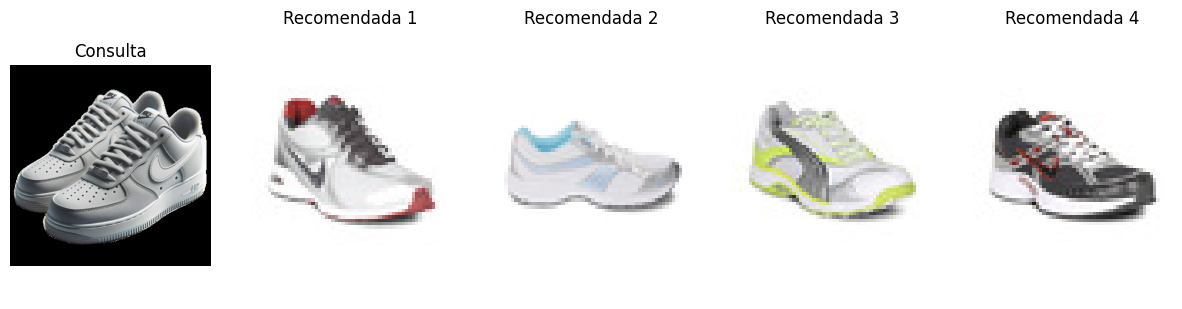

In [23]:
plot('tenis.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


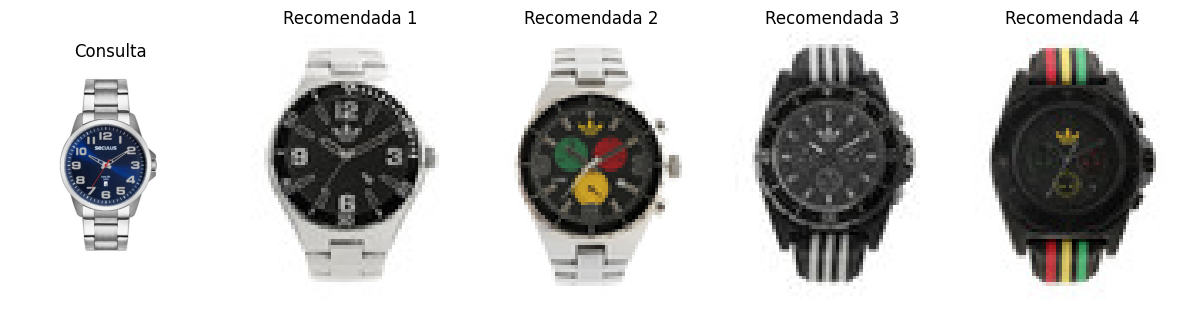

In [24]:
plot('relogio.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


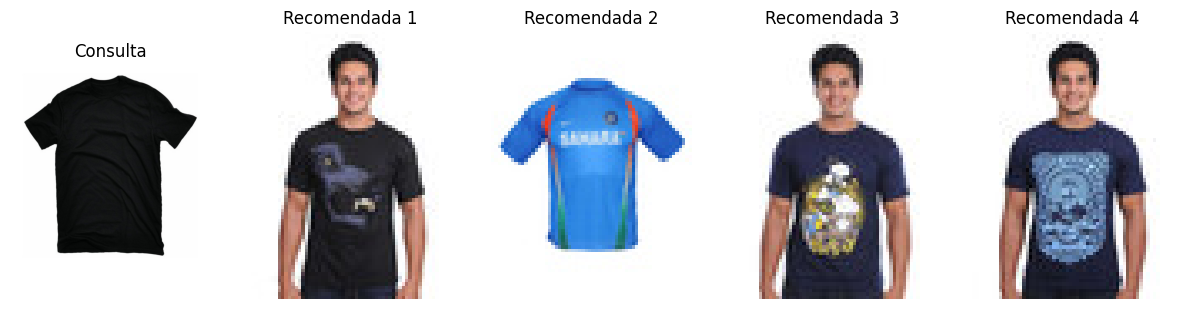

In [25]:
plot('camisa.jpg')